###  auROC performance of different combinations of higher-order nucleotide dependencies

In [1]:
import pandas as pd
from Utils.util_function import get_tfs

TFs = get_tfs()
data_strategies = [['seq'], ['shape'], ['histone'],
                    ['seq', 'shape'], ['seq', 'histone'],['shape', 'histone'], ['seq', 'shape', 'histone']]

data_fig = pd.DataFrame(columns=['strategy', 'auROC'])
strategy = []
auROC = []
for tf in TFs:
    for stegy in data_strategies:
        file_name = tf
        strategy_name = ""
        for s in  stegy:
            file_name += "_" + s
            if strategy_name == "":
                strategy_name = s
            else:
                strategy_name += "+"+s
        roc = pd.read_csv("./dataFusion_result/" + file_name + ".csv")['roc_auc'][0]
        strategy.append(strategy_name)
        auROC.append(roc)
data_fig['strategy'] = strategy
data_fig['auROC'] = auROC
data_fig


,strategy,auROC
0,seq,0.800242
1,shape,0.822635
2,histone,0.942707
3,seq+shape,0.831673
4,seq+histone,0.967431
5,shape+histone,0.944325
6,seq+shape+histone,0.977094
7,seq,0.569660
8,shape,0.534282
9,histone,0.708933


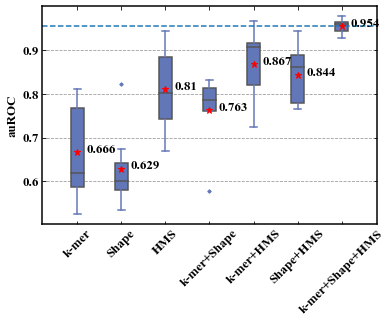

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='Times New Roman', size=13, weight='bold')
plt.rc('axes', axisbelow=True)

fontdict_label = {'family': "Times New Roman", 'size': 13, 'weight': "bold"}
plt.figure()
colors = ["#5470c6","#5470c6","#5470c6", "#5470c6", "#5470c6", "#5470c6"]
ax = sns.boxplot(data=data_fig, x="strategy", y='auROC',
            fliersize=2.5,
            showmeans=True,
            meanprops=dict(color='black', marker="*", markerfacecolor="red", markeredgecolor="red", markersize=7),
            # medianprops=dict(linewidth=0),
            width=0.3,
             palette=colors)

mean_list = [.6662938791027008, .629111196970446, .8101838678827927, .7634408594716715, .8672087329948969, .8435578696951637, .9539150127858019]
for i in range(7):
    ax.text(i+0.20, mean_list[i], np.round(mean_list[i], 3))

ax.axhline(y=.9539150127858019, linestyle='--')
ax.spines[['right', 'left', 'top', 'bottom']].set_color('black')
ax.spines[['right', 'left', 'top', 'bottom']].set_linewidth('1.5')
ax.grid(axis='y', linestyle='--', alpha=0.8, zorder=0, linewidth=0.8, color='gray')
xticks = ['k-mer', 'Shape', 'HMS', 'k-mer+Shape', "k-mer+HMS", "Shape+HMS", "k-mer+Shape+HMS", ]

ax.set_xlim((-0.8, 6.8))
ax.set_xticks(range(7), xticks, rotation=45, fontfamily='Times New Roman', fontsize=13, fontweight='bold')
ax.set_yticks([0.6, 0.7, 0.8, 0.9], fontfamily='Times New Roman', fontsize=13, fontweight='bold')
ax.set_xlabel(None)
ax.set_ylabel("auROC", fontdict_label)

plt.tick_params(top=True, bottom=True, left=True, right=True, direction='in')
# plt.savefig("boxplot.eps", bbox_inches='tight', dpi=300)
plt.show()

### Contribution of each DNA shape relative to all four DNA shapes and each histone modification feature relative to all eight histone modifications. The contribution is measured by delta auROC.

In [6]:
import os
import numpy as np
from Utils.util_function import get_tfs
import pandas as pd

data_fig = np.zeros(shape=(4, 7))
path = "../DataFusion_shape/dataFusionShape_result"
shapes = ['HelT', 'MGW', 'ProT', 'Roll']
tfs = get_tfs()
csv_files = os.listdir(path)
for file in csv_files:
    if file.endswith(".csv"):
        tmp = pd.read_csv(path + "/" + file)
        roc = tmp['roc_auc'][0]
        file_split = file.split("_")
        tf = file_split[0]
        shape = file_split[1][:file_split[1].index(".")]
        data_fig[shapes.index(shape), tfs.index(tf)] = roc

data_pre = np.array([0.9771, 0.9466, 0.9385, 0.9617, 0.9662, 0.9283, 0.9590])
for i in range(4):
    data_fig[i] = data_pre - data_fig[i]
data_fig.shape

(4, 7)

['HelT' 'MGW' 'ProT' 'Roll' 'HelT']


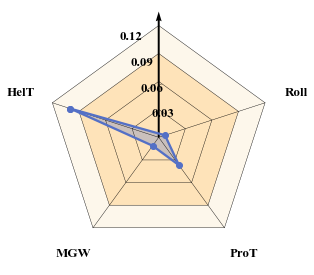

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from Utils.util_function import  get_shapes

plt.rc('font', family='Times New Roman', size=13, weight='bold')
fontdict_label = {'family': "Times New Roman", 'size': 13, 'weight': "bold"}

labels = get_shapes()
N = 5
angles = np.linspace(0, 2*np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

labels = np.concatenate((labels, [labels[0]]))
print(labels)
fig = plt.figure(figsize=(4.8, 4.8))
ax = fig.add_subplot(111, polar=True)

ax.set_ylim((0, .14))
# 4边形
for i in np.linspace(0, 0.12, 5):
    ax.plot(angles, [i]*6, "-", color='black', lw=0.4)

# 分割线
for i in range(5):
    if not i == 0:
        ax.plot([angles[i], angles[i]], [0.0, 0.12], '-', color='black', lw=0.4)

# 填充默认颜色
outter_data = np.array([.12]*6)
outter_color = "#FDF5E6"
ax.fill(angles, outter_data, facecolor=outter_color, alpha=.8, zorder=0)
#
inner_data = np.array([.09]*6)
inner_color = "#FFDEAD"
ax.fill(angles, inner_data, facecolor=inner_color, alpha=.8, zorder=0)
#
colors = ['#5470c6', "#0098d9", "#2b821d", "#e6b600"]
#
# # for i in [3, 1, 2, 0]:
data_ = np.sum(data_fig, axis=1) / 7
# tmp = np.concatenate((data_, [data_[0]]))
tmp = data_
ax.plot(np.concatenate((angles[1:-1], [angles[1]])), np.concatenate((tmp, [tmp[0]])), color=colors[0], marker='o', lw=2.3)
ax.fill(angles[1: -1], tmp, zorder=0, alpha=0.3, color=colors[0])
#
ax.set_theta_zero_location('N')
labels = ["", 'HelT', 'MGW', 'ProT', 'Roll', ""]
ax.set_thetagrids(angles * 180 / np.pi, labels)
ax.spines['polar'].set_visible(False)
# ax.arrow(x=0, y=0, dx=0.0, dy=0.13, linewidth=0.5, length_includes_head=False,head_width=0.05,head_length=0.01, color='black')
ax.quiver(0, 0, 0, 0.135,  angles='xy', scale=1, scale_units='xy', linewidth=0.5,)
ax.grid(False)
ax.set_yticks([0.02, 0.05, 0.08, 0.11], [0.03, 0.06, 0.09, 0.12],fontfamily='Times New Roman', fontsize=13, fontweight='bold', zorder=10, )
# # labels = shapes
# patch_list = [
#     plt.plot([], [], marker='o', ms=5, ls='', color=colors[i],
#              label='{:s}'.format(labels[i]))[0] for i in range(len(labels))
# ]
# plt.legend(bbox_to_anchor=(1.225, 0.), loc=1, ncol=4, frameon=False,handlelength=0.7, handles=patch_list)
plt.savefig("redar_shape.pdf", bbox_inches='tight', dpi=300)

plt.show()

In [9]:
import os
import numpy as np
from Utils.util_function import get_tfs, get_histones
import pandas as pd

data_fig = np.zeros(shape=(8, 7))
path = "../DataFusion_histone/dataFusionHistone_result"
shapes = get_histones()
tfs = get_tfs()
csv_files = os.listdir(path)
for file in csv_files:
    if file.endswith(".csv"):
        tmp = pd.read_csv(path + "/" + file)
        roc = tmp['roc_auc'][0]
        file_split = file.split("_")
        tf = file_split[0]
        shape = file_split[1][:file_split[1].index(".")]
        data_fig[shapes.index(shape), tfs.index(tf)] = roc

data_pre = np.array([0.9771, 0.9466, 0.9385, 0.9617, 0.9662, 0.9283, 0.9590])
for i in range(8):
    data_fig[i] = data_pre - data_fig[i]
data_fig.shape

(8, 7)

<Figure size 345.6x345.6 with 0 Axes>

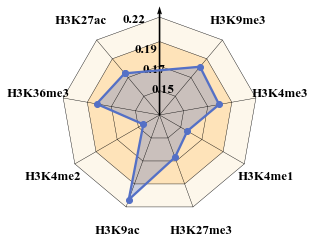

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Utils.util_function import  get_shapes

plt.rc('font', family='Times New Roman', size=13, weight='bold')
fontdict_label = {'family': "Times New Roman", 'size': 13, 'weight': "bold"}
plt.figure(figsize=(4.8, 4.8))

labels = get_shapes()
N = 9
angles = np.linspace(0, 2*np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

ax.set_ylim((0.13, 0.23))
# 9边形
for i in np.linspace(0.13, 0.22, 5):
    ax.plot(angles, [i]*(N+1), "-", color='black', lw=0.4)

# # 分割线
for i in range(9):
    if not i == 0:
        ax.plot([angles[i], angles[i]], [0.13, 0.22], '-', color='black', lw=0.4)
# 填充默认颜色
outter_data = np.array([.22]*(N+1))
outter_color = "#FDF5E6"
ax.fill(angles, outter_data, facecolor=outter_color, alpha=.8, zorder=0)

inner_data = np.array([0.1975]*(N+1))
inner_color = "#FFDEAD"
ax.fill(angles, inner_data, facecolor=inner_color, alpha=.8, zorder=0)
# # #
colors = ['#5470c6', "#0098d9", "#2b821d", "#e6b600"]
# #
# # # for i in [3, 1, 2, 0]:
data_ = np.sum(data_fig, axis=1) / 7

# tmp = np.concatenate((data_, [data_[0]]))
tmp = data_
ax.plot(np.concatenate((angles[1:-1], [angles[1]])), np.concatenate((tmp, [tmp[0]])), color=colors[0], marker='o', lw=2.3)
ax.fill(angles[1: -1], tmp, zorder=0, alpha=0.3, color=colors[0])

ax.set_theta_zero_location('N')
labels = [""] + get_histones() + [""]
ax.set_thetagrids(angles * 180 / np.pi, labels)
ax.spines['polar'].set_visible(False)
# ax.arrow(x=0, y=0.12, dx=0.0, dy=0.21, linewidth=0.5, length_includes_head=False, color='black', zorder=10)
ax.quiver(0, 0.13, 0, 0.10,  angles='xy', scale=1, scale_units='xy', linewidth=0.5,)
ax.grid(False)
ax.set_yticks([0.15,0.17,0.19, 0.22],fontfamily='Times New Roman', fontsize=13, fontweight='bold', zorder=10, )
# plt.tight_layout()
# plt.savefig("redar_hist.pdf", bbox_inches='tight', dpi=300)
plt.show()

### Contribution of each DNA shape and histone modification on the binding site prediction of different TFs

In [42]:
import os
import numpy as np
from Utils.util_function import get_tfs, get_histones
import pandas as pd

matrix_shape = np.zeros(shape=(4, 7))
matrix_histone = np.zeros(shape=(8, 7))

path = "../DataFusion_shape/dataFusionShape_result"
shapes = ['HelT', 'MGW', 'ProT', 'Roll']
tfs = get_tfs()
csv_files = os.listdir(path)
for file in csv_files:
    if file.endswith(".csv"):
        tmp = pd.read_csv(path + "/" + file)
        roc = tmp['roc_auc'][0]
        file_split = file.split("_")
        tf = file_split[0]
        shape = file_split[1][:file_split[1].index(".")]
        matrix_shape[shapes.index(shape), tfs.index(tf)] = roc


path = "../DataFusion_histone/dataFusionHistone_result"
histones = get_histones()
csv_files = os.listdir(path)
for file in csv_files:
    if file.endswith(".csv"):
        tmp = pd.read_csv(path + "/" + file)
        roc = tmp['roc_auc'][0]
        file_split = file.split("_")
        tf = file_split[0]
        hist = file_split[1][:file_split[1].index(".")]
        matrix_histone[histones.index(hist), tfs.index(tf)] = roc
data_pre = np.array([0.9771, 0.9466, 0.9385, 0.9617, 0.9662, 0.9283, 0.9590])
for i in range(4):
    matrix_shape[i] = data_pre - matrix_shape[i]

for i in range(8):
    matrix_histone[i] = data_pre - matrix_histone[i]
matrix = np.concatenate((matrix_histone, matrix_shape), axis=0)
matrix = pd.DataFrame(columns=tfs, data=matrix, index=get_histones()+['HelT', 'MGW', 'ProT', 'Roll'])
matrix

,EZH2,GABPA,JUND,MAX,NRF1,RFX5,TAF1
H3K27ac,0.146394,0.126984,0.180871,0.183437,0.195837,0.104210,0.322113
H3K36me3,0.141563,0.157892,0.178116,0.196928,0.164208,0.104169,0.378871
H3K4me2,0.089642,0.136396,0.135905,0.128192,0.103706,0.157115,0.279606
H3K9ac,0.165381,0.175732,0.197301,0.206089,0.157633,0.222260,0.365547
H3K27me3,0.056715,0.157837,0.146334,0.198858,0.160416,0.103479,0.376487
H3K4me1,0.142023,0.133975,0.110015,0.170354,0.140603,0.090466,0.329233
H3K4me3,0.120052,0.165616,0.188539,0.208843,0.175079,0.130621,0.310421
H3K9me3,0.129560,0.159789,0.176988,0.199685,0.164227,0.103893,0.381184
HelT,0.006240,0.145088,0.135787,0.102025,0.254405,0.028886,0.025117
MGW,0.004324,0.044377,0.014829,0.001652,0.003437,0.004622,0.004810


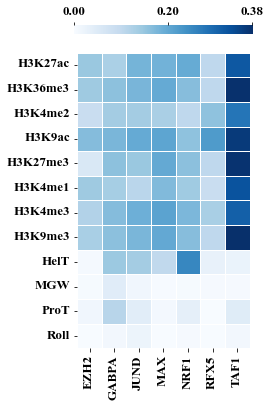

In [55]:
import seaborn as sns
plt.figure(figsize=(16*0.2 ,8.5*0.8))

ax = sns.heatmap(matrix, cmap='Blues', linewidths=0.5,linecolor='white', square=True, cbar_kws=dict(location='top',  ticks=[0.0, 0.2, 0.38], ), vmin=0, vmax=np.max(matrix.values))
plt.savefig("histmap.pdf", bbox_inches='tight', dpi=300)
plt.show()

### auROC performance of different order degrees of the k-mer encoding

In [13]:
# data prepare
matrix_order = np.zeros(shape=(4, 7))
path = "../DataFusion_seq/dataFusionSeq_result"
orders = ['1', '2', '3', '4']
tfs = get_tfs()
csv_files = os.listdir(path)
for file in csv_files:
    if file.endswith(".csv"):
        tmp = pd.read_csv(path + "/" + file)
        roc = tmp['roc_auc'][0]
        file_split = file.split("_")
        tf = file_split[0]
        order = file_split[1][:file_split[1].index(".")]
        matrix_order[orders.index(order), tfs.index(tf)] = roc
matrix_order = pd.DataFrame(matrix_order, columns=tfs, index=orders)
matrix_order

,EZH2,GABPA,JUND,MAX,NRF1,RFX5,TAF1
1,0.961596,0.927545,0.891076,0.948961,0.946260,0.936112,0.951264
2,0.966515,0.931794,0.902794,0.950036,0.947056,0.934055,0.949557
3,0.977100,0.946600,0.938500,0.961700,0.966200,0.928300,0.959000
4,0.964129,0.932682,0.879365,0.950739,0.941293,0.939930,0.950716


In [14]:
data_fig = pd.DataFrame(columns=['tfs', 'order', 'auROC'])
data_tmp = pd.DataFrame(columns=['tfs', 'order', 'auROC'])
for tf in tfs:
    data_tmp['tfs'] = [tf] * len(matrix_order)
    data_tmp['order'] = matrix_order.index.tolist()
    data_tmp['auROC'] = matrix_order[tf].tolist()
    data_fig = pd.concat([data_fig, data_tmp], ignore_index=True)
data_fig

,tfs,order,auROC
0,EZH2,1,0.961596
1,EZH2,2,0.966515
2,EZH2,3,0.977100
3,EZH2,4,0.964129
4,GABPA,1,0.927545
5,GABPA,2,0.931794
6,GABPA,3,0.946600
7,GABPA,4,0.932682
8,JUND,1,0.891076
9,JUND,2,0.902794


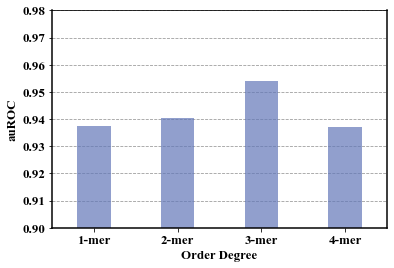

In [20]:
# figure
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Times New Roman', size=13, weight='bold')
plt.rc('axes', axisbelow=True)
fontdict_label = {'family': "Times New Roman", 'size': 13, 'weight': "bold"}
colors = ["#5470c6"]
newwidth = 0.4

ax = sns.barplot(data=data_fig, x='order', y='auROC', errwidth=0, palette=colors, alpha=0.7)

for bar in ax.patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)
ax.spines[['right', 'bottom', 'right', 'left']].set_color('black')
ax.spines[['right', 'bottom', 'right', 'left']].set_linewidth('1.5')
ax.set_ylim(0.90, .98)
ax.grid(axis='y', linestyle='--', alpha=0.8, zorder=0, linewidth=0.8, color='gray')
ax.set_xlabel("Order Degree", fontdict_label)
ax.set_ylabel("auROC", fontdict_label)
ax.set_xticks(range(4), ['1-mer', '2-mer', '3-mer', '4-mer'])

# ax.tick_params(top=False, bottom=True, left=True, right=True, direction='in')
# plt.savefig("bar.eps", bbox_inches='tight', dpi=300)
plt.show()

###  Visualization of the DNA shape distribution of GABPA and the histone modification distribution of TAF1 across different cell types

In [21]:
from Utils.util_function import get_shapes, get_cells
import pandas as pd
import numpy as np
cells = get_cells()
tf = 'GABPA'
shapes = get_shapes()
path = '../pearsonr'

data_seq = pd.read_csv("../pearsonr/GABPA/sequence/All.csv", header=None)
cell_label = data_seq[3]
matrix = np.zeros(shape=(4, 5, 101))
for s, shape in enumerate(shapes):
    for i, cell in enumerate(cells):
        cell_index = np.where(cell_label == i)[0]
        data = pd.read_csv("../pearsonr/GABPA/shape/All_" + shape + ".csv", header=None)
        data = data.loc[cell_index, :]
        data = data.mean().tolist()
        matrix[s, i, :] = data
matrix.shape

(4, 5, 101)

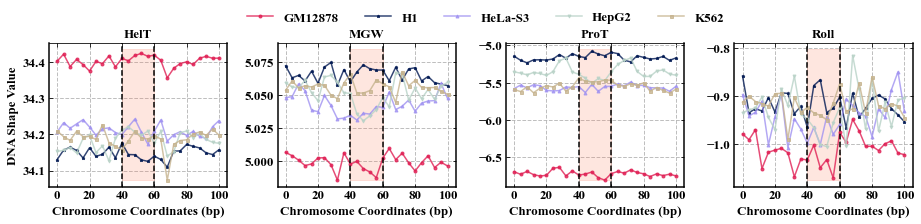

In [22]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
np.random.seed(10086)
plt.rc('font', family='Times New Roman', size=13, weight='bold')
plt.rc('axes', axisbelow=True)

fontdict_label = {'family': "Times New Roman", 'size': 13, 'weight': "bold"}

plt.figure(figsize=(13, 3))
gs = gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])
ax4 = plt.subplot(gs[0, 3])

colors = ["#e01f54", "#001852", "#a092f1", "#b8d2c7", "#c6b38e"]
markers = ['o', "*", "^", 'v', "s"]


def line(ax, matrix):
    """
    matrix shape: 5, 101
    """
    for i in range(len(matrix)):
        ys = matrix[i]
        ys = sample(ys, 25)
        ax.plot(ys, lw=1.5, label=cells[i], marker=markers[i], ms=3, color=colors[i], alpha=0.8)
def sample(arr, cnt):
    interval = len(arr) // cnt
    return arr[::interval]

for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    tmp = matrix[i]
    line(ax, tmp)
    ax.spines[['right', 'bottom', 'right', 'left']].set_color('black')
    ax.spines[['right', 'bottom', 'right', 'left']].set_linewidth('1.5')
    ax.grid(axis='both', linestyle='--', alpha=0.8, zorder=0, linewidth=1.)
    ax.set_xticks([0, 5, 10, 15, 20, 25], [0, 20, 40, 60, 80, 100])
    ax.fill_betweenx([np.min(tmp), np.max(tmp)], x1=[10], x2=[15], color='#FB8263', alpha=0.2)
    ax.axvline(x=10, linestyle='--', color='black')
    ax.axvline(x=15, linestyle='--', color='black')
    ax.tick_params(top=True, bottom=True, left=True, right=True, direction='in')
    ax.set_title(shapes[i], fontdict_label)
    ax.set_xlabel("Chromosome Coordinates (bp)", fontdict_label)

ax1.set_ylabel("DNA Shape Value", fontdict_label)
plt.tight_layout()
plt.legend(bbox_to_anchor=(-2.8, 1.3), frameon=False, loc=2, ncol=5,)
# plt.savefig("line_shape.eps", bbox_inches='tight', dpi=300)
plt.show()

In [23]:
from Utils.util_function import get_shapes, get_cells
import pandas as pd
def get_histone(path):
    histone = pd.read_csv(path, header=None, index_col=None)
    histone = histone.fillna(0)
    num = histone.shape[0] // 8
    histone = histone.values
    histone = np.array(np.split(histone, num))
    return histone
matrix = np.zeros(shape=(5, 8, 101))

cells = get_cells()
for i, cell in enumerate(cells):
    data = get_histone("./Histone_101/" + cell + "_GABPA_All_his.csv")
    data = np.mean(data, axis=0)
    matrix[i] = data
matrix = matrix.transpose((1, 0, 2))
matrix.shape

(8, 5, 101)

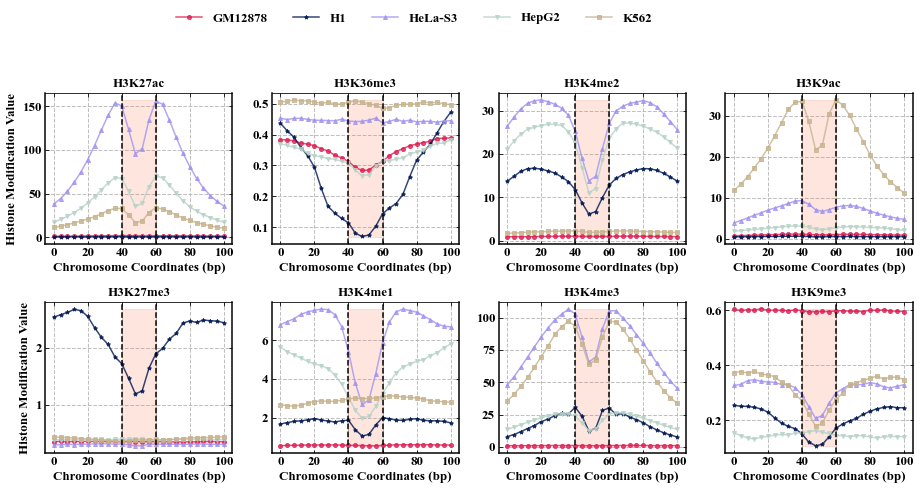

In [32]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from Utils.util_function import get_shapes, get_cells, get_histones
np.random.seed(10086)
plt.rc('font', family='Times New Roman', size=13, weight='bold')
fontdict_label = {'family': "Times New Roman", 'size': 13, 'weight': "bold"}

histones = get_histones()
plt.figure(figsize=(13, 6))
gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])
ax4 = plt.subplot(gs[0, 3])

ax5 = plt.subplot(gs[1, 0])
ax6 = plt.subplot(gs[1, 1])
ax7 = plt.subplot(gs[1, 2])
ax8 = plt.subplot(gs[1, 3])

colors = ["#e01f54", "#001852", "#a092f1", "#b8d2c7", "#c6b38e"]
markers = ['o', "*", "^", 'v', "s"]


def sample(arr, cnt):
    interval = len(arr) // cnt
    return arr[::interval]

def line(ax, matrix):
    """
    matrix shape: 5, 101
    """
    for i in range(len(matrix)):
        ys = matrix[i]
        ys = sample(ys, 25)
        ax.plot(ys, lw=1.5, label=cells[i], marker=markers[i], ms=4, color=colors[i], alpha=0.8)

for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]):
    tmp = matrix[i]
    line(ax, tmp)
    ax.spines[['right', 'bottom', 'right', 'left']].set_color('black')
    ax.spines[['right', 'bottom', 'right', 'left']].set_linewidth('1.5')
    ax.grid(axis='both', linestyle='--', alpha=0.8, zorder=0, linewidth=1.)
    ax.fill_betweenx([np.min(tmp), np.max(tmp)], x1=[10], x2=[15], color='#FB8263', alpha=0.2)
    ax.axvline(x=10, linestyle='--', color='black')
    ax.axvline(x=15, linestyle='--', color='black')
    ax.set_xticks([0, 5, 10, 15, 20, 25], [0, 20, 40, 60, 80, 100])
    ax.tick_params(top=True, bottom=True, left=True, right=True, direction='in')
    ax.set_title(histones[i], fontdict_label)
    ax.set_xlabel("Chromosome Coordinates (bp)", fontdict_label)
ax1.set_ylabel("Histone Modification Value", fontdict_label)
ax5.set_ylabel("Histone Modification Value", fontdict_label)
plt.tight_layout()
plt.legend(bbox_to_anchor=(-3., 3.0), frameon=False, loc=2, ncol=5,)
# plt.savefig("legend.pdf", bbox_inches='tight', dpi=300)
plt.show()